In [4]:
using Revise, HarmonicBalance, Plots
include("../plotting.jl")
@variables γ, F, ω, t, x(t), y(t), γ1, γ3, ω1, ω3, α1111, α3333, α1133, α3111, α1113, F1, F3, η1, η3;

In [2]:
diff_eq = DifferentialEquation([
            d(x,t,2) + γ1 * d(x,t) + ω1^2 * x + α1111*x^3 + α1133*x*y^2 + α1113*x^2*y + η1*x^2*d(x,t) - F1*cos(ω*t), 
            d(y,t,2) + γ3 * d(y,t) + ω3^2 * y + α3333*y^3 + α1133*x^2*y + α3111*x^3 + η3*y^2*d(y,t) - F3*cos(ω*t)], [x,y])

# describe each variable using one or more Fourier components
add_harmonic!(diff_eq, x, ω)
add_harmonic!(diff_eq, y, 3*ω)
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 4 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T)
Parameters: α1111, ω, γ1, ω1, α1133, F1, α1113, η1, α3111, α3333, γ3, ω3, F3, η3

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)
y(t) = u2(T)*cos(3ωt) + v2(T)*sin(3ωt)

Harmonic equations:

(ω1^2)*u1(T) + γ1*Differential(T)(u1(T)) + (3//4)*α1111*(u1(T)^3) + γ1*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (1//2)*α1133*(u2(T)^2)*u1(T) + (1//2)*α1133*(v2(T)^2)*u1(T) + (3//4)*α1111*(v1(T)^2)*u1(T) + (1//4)*η1*ω*(v1(T)^3) + (1//4)*α1113*(u1(T)^2)*u2(T) + (1//4)*η1*(v1(T)^2)*Differential(T)(u1(T)) + (3//4)*η1*(u1(T)^2)*Differential(T)(u1(T)) + (1//2)*α1113*u1(T)*v1(T)*v2(T) + (1//4)*η1*ω*(u1(T)^2)*v1(T) + (1//2)*η1*u1(T)*v1(T)*Differential(T)(v1(T)) - F1 - (ω^2)*u1(T) - (1//4)*α1113*(v1(T)^2)*u2(T) ~ 0

(ω1^2)*v1(T) + γ1*Differential(T)(v1(T)) + (3//4)*α1111*(v1(T)^3) + (1//4)*α1113*(u1(T)^2)*v2(T) + (3//4)*α1111*(u1(T)^2)*v1(T) + (1//2)*α1133*(u2(T)^2)*v1(T) + (1//2)*α1133*(v2(T)^2)*v1(T) + (1//4)*η1*(u1(T)^2)*Differ

In [5]:
std = HarmonicBalance.rearrange_standard(harmonic_eq)

A set of 4 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T)
Parameters: α1111, ω, γ1, ω1, α1133, F1, α1113, η1, α3111, α3333, γ3, ω3, F3, η3

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)
y(t) = u2(T)*cos(3ωt) + v2(T)*sin(3ωt)

Harmonic equations:

((ω1^2)*u1(T) + (-((-2//1)*ω - (1//2)*η1*u1(T)*v1(T))*((ω1^2)*v1(T) + (-((2//1)*ω - (1//2)*η1*u1(T)*v1(T))*((ω1^2)*u1(T) + (3//4)*α1111*(u1(T)^3) + γ1*ω*v1(T) + (1//2)*α1133*(u2(T)^2)*u1(T) + (1//2)*α1133*(v2(T)^2)*u1(T) + (3//4)*α1111*(v1(T)^2)*u1(T) + (1//4)*η1*ω*(v1(T)^3) + (1//4)*α1113*(u1(T)^2)*u2(T) + (1//2)*α1113*u1(T)*v1(T)*v2(T) + (1//4)*η1*ω*(u1(T)^2)*v1(T) - F1 - (ω^2)*u1(T) - (1//4)*α1113*(v1(T)^2)*u2(T))) / (-γ1 - (1//4)*η1*(v1(T)^2) - (3//4)*η1*(u1(T)^2)) + (3//4)*α1111*(v1(T)^3) + (1//4)*α1113*(u1(T)^2)*v2(T) + (3//4)*α1111*(u1(T)^2)*v1(T) + (1//2)*α1133*(u2(T)^2)*v1(T) + (1//2)*α1133*(v2(T)^2)*v1(T) - (ω^2)*v1(T) - (1//4)*α1113*(v1(T)^2)*v2(T) - (1//4)*η1*ω*(u1(T)^3) - γ1*ω*u1(T) - (1//4)*η1*ω*(v1(T)^2)*u1(T)

In [5]:
a = 1E-5

fixed_parameters = (
    ω1 => 1.0,
    ω3 => 3.0,
    γ1 => 1E-3,
    γ3 => 1E-3,
    α1111 => a,
    α3333 => 81*a,
    α1133 => (72/5)*a,
    α3111 => -(3/5)*a,
    α1113 => -(9/5)*a,
    η1 => 0,
    η3 => 0,
    F3 => 0.5,
    F1 => 0.5
)

range = ω => LinRange(0.95,1.15, 300)
result = get_steady_states(harmonic_eq, range, fixed_parameters, random_warmup=true)

Solving for 300 parameters... 100%|█████████████████████| Time: 0:00:00
  # parameters solved:  300
  # paths tracked:      2700


A steady state result for 300 parameter points

Solution branches:   9
   of which real:    7
   of which stable:  3

Classes: stable, physical, Hopf, binary_labels


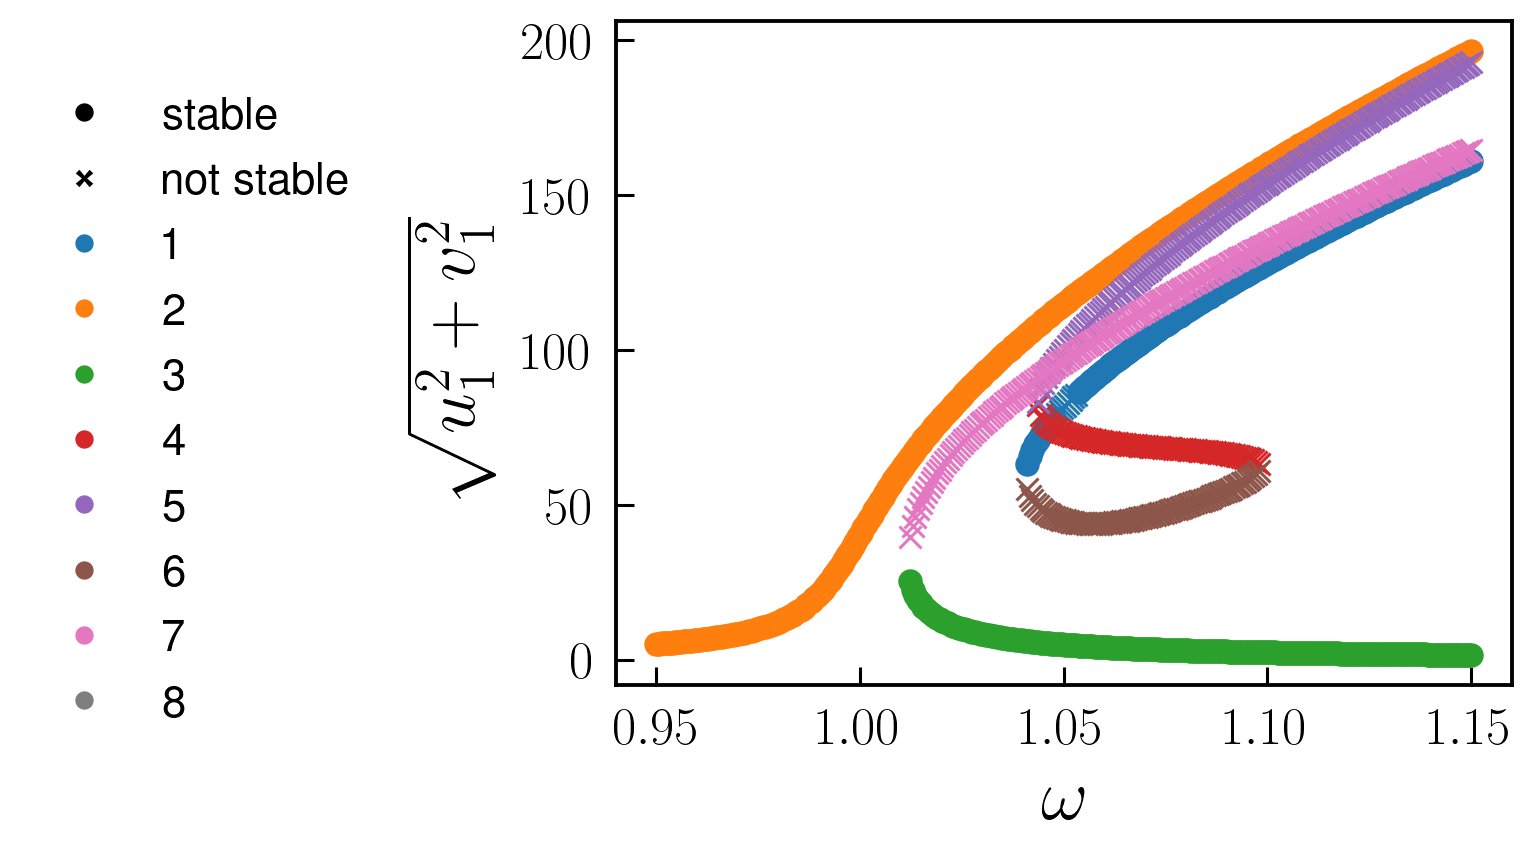

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/hrochan/.julia/packages/PyCall/L0fLP/src/numpy.jl:67
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [4]:
HarmonicBalance.plot(result, x="ω", y="sqrt(u1^2 + v1^2)");

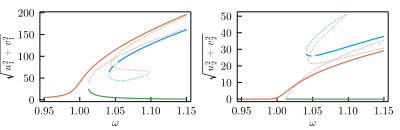

In [5]:
size = (400, 130)
Plots.default(linewidth=1.2)
p1 = HarmonicBalance.plot1D(result,x="ω", y="sqrt(u1^2 + v1^2)", xlabel="\$ ω\$", ylabel="\$ \\sqrt{u_1^2 + v_1^2} \$", left_margin=-0mm)
p2 = HarmonicBalance.plot1D(result,x="ω", y="sqrt(u2^2 + v2^2)", xlabel="\$ ω\$", ylabel="\$ \\sqrt{u_2^2 + v_2^2} \$", left_margin=-0mm)
p3 = Plots.plot(p1, p2, size=size)

In [6]:
savefig(p3, dir * "/hb/11_33_ss.svg")

Solving for 300 parameters... 100%|█████████████████████| Time: 0:00:01
  # parameters solved:  300
  # paths tracked:      2700


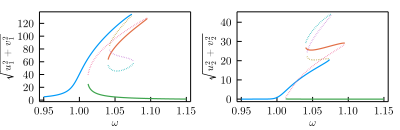

In [26]:
fixed_parameters = (
    ωx => 1.0,
    ωy => 3.0,
    γx => 1E-3,
    γy => 1E-3,
    α1111 => a,
    α3333 => 81*a,
    α1133 => (72/5)*a,
    α3111 => -(3/5)*a,
    α1113 => -(9/5)*a,
    η1 => 5E-7,
    η3 => 5E-7,
    F3 => 0.5,
    F1 => 0.5
)

result = get_steady_states(harmonic_eq, range, fixed_parameters, random_warmup=true)

p1 = HarmonicBalance.plot1D(result,x="ω", y="sqrt(u1^2 + v1^2)", xlabel="\$ ω\$", ylabel="\$ \\sqrt{u_1^2 + v_1^2} \$", left_margin=-0mm)
p2 = HarmonicBalance.plot1D(result,x="ω", y="sqrt(u2^2 + v2^2)", xlabel="\$ ω\$", ylabel="\$ \\sqrt{u_2^2 + v_2^2} \$", left_margin=-0mm)
p3 = Plots.plot(p1, p2, size=size)


In [27]:
savefig(p3, dir * "/hb/11_33_ss_nld.svg")

# Time-dependent stuff

In [142]:
import HarmonicBalance.TimeEvolution: ParameterSweep, ODEProblem, DifferentialEquations
start_soln = result[100][1]
sweep = ParameterSweep(ω => (1.1, 1.047), (0, 5E4))
problem = ODEProblem(harmonic_eq, start_soln, timespan=(0,10E4), sweep=sweep)
time_soln = DifferentialEquations.solve(problem,saveat=10);

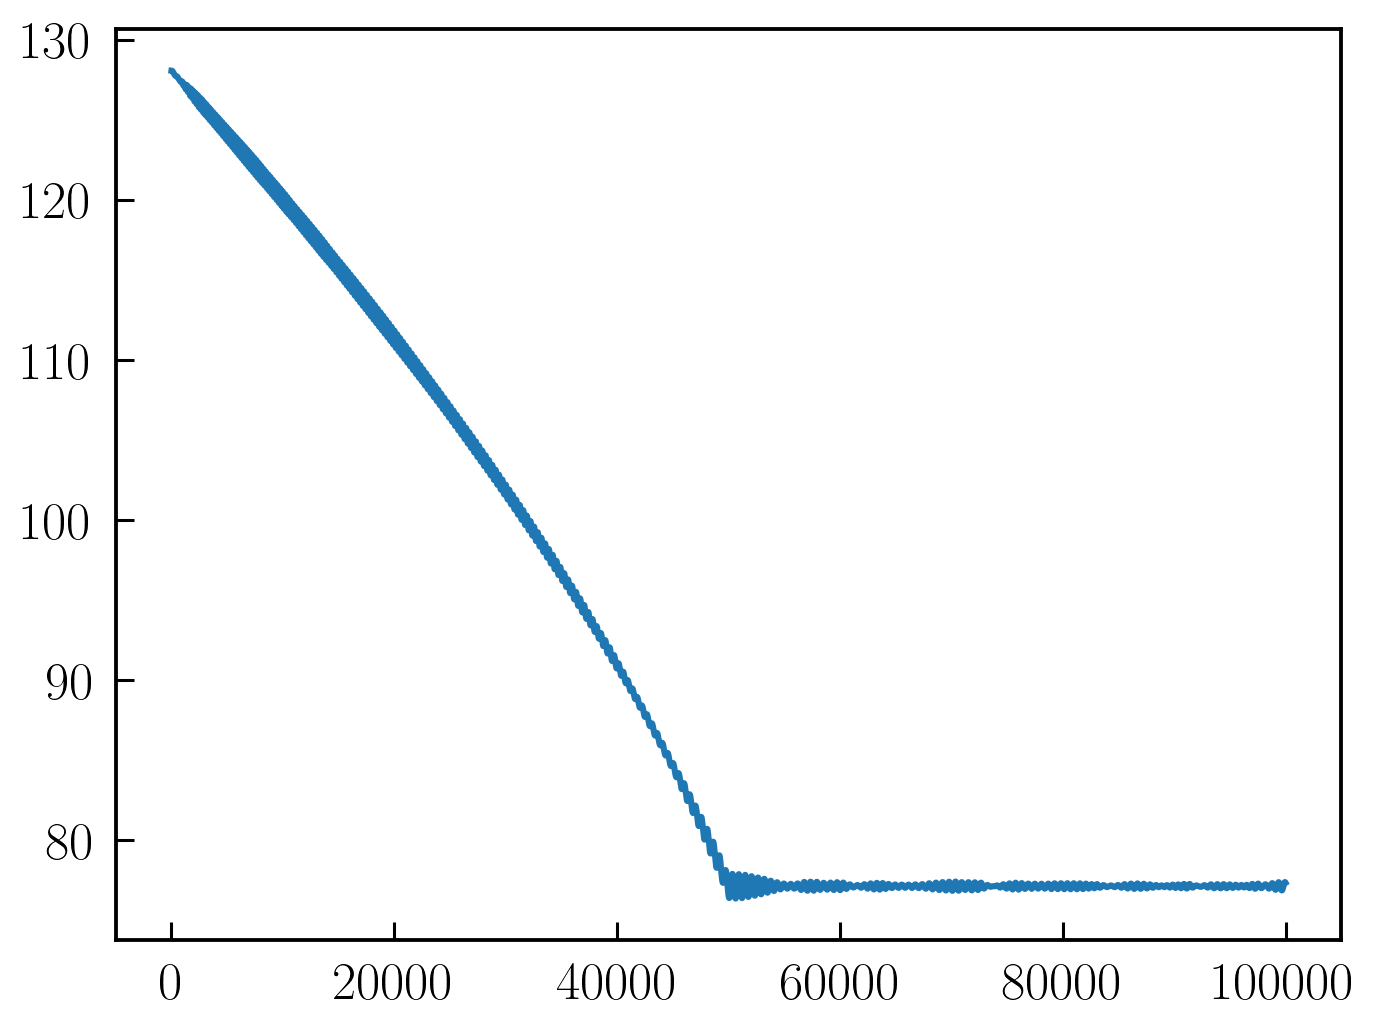

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f09af1b86d0>

In [143]:
HarmonicBalance.plot(time_soln, "sqrt(u1^2 + v1^2)", harmonic_eq)